# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy import stats  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(stats.chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(stats.normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=38.69323106073592, pvalue=3.961609200867749e-09)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(stats.kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## $\chi^{2}$ Test for 1 categorical variable. (Pearson's $\chi^{2}$ test)

| Roll:     |  1  |  2  |  3  |  4  |  5  |  6  |
|-----------|-----|-----|-----|-----|-----|-----|
| Observed: |  27 | 13  |  10 | 15  | 30  |  32 |
| Expected: |   |   |   |   |   |   |

Null Hypothesis: The distribution of observed frequencies is equal to the distribution of expected frequencies (The die is fair)

Alternative Hypothesis: The distribution of observed frequencies is not equal to the distribution of expected frequencies - they are different. (The die is unfair)

In [0]:
import numpy as np

rolls = np.array([27,13,10,15,30,32])

average = rolls.sum()/len(rolls)

# I can't use the middle value to ask questions about an entire distribution
# Middle of the distribution - mean
average

21.166666666666668

An expected frequency is:

\begin{align}
\frac{\text{total observations}}{\text{# categories}}
\end{align}

In [0]:
observed = rolls

observed

array([27, 13, 10, 15, 30, 32])

In [0]:
# expected frequency of each side of the die
# each side has the same expected frequency with a fair die
expected_frequency = rolls.sum() / 6

expected_frequency

expected = [expected_frequency,expected_frequency,expected_frequency,expected_frequency,expected_frequency,expected_frequency]

expected

[21.166666666666668,
 21.166666666666668,
 21.166666666666668,
 21.166666666666668,
 21.166666666666668,
 21.166666666666668]

\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}

In [0]:
# For my first cell

(27 - 21.1666666666)**2 / 21.1666666666

1.6076115485982383

In [0]:
# Numpy is amazing

# First with lists
a = [1,2,3]
b = [4,5,6]

a + b

[1, 2, 3, 4, 5, 6]

In [0]:
a / b

TypeError: ignored

In [0]:
# array-broadcasting
# do the math element-wise
# cell by cell

a = np.array(a)
b = np.array(b)

a + b

array([5, 7, 9])

In [0]:
a / b

array([0.25, 0.4 , 0.5 ])

### Use array broadcasting to calculate my $\chi^2$ statistic

In [0]:
chi_squared = ((observed - expected)**2 / expected ).sum()

chi_squared

21.67716535433071

In [0]:
p_value = 0.0006

p_value

0.0006

In [0]:
from scipy import stats

stats.chisquare(observed, expected)

Power_divergenceResult(statistic=21.67716535433071, pvalue=0.0006029877129094496)

Confidence Level: 95% 

### Conclusion:

Based on a chi^2 statistic of 21.677 and a p-value of .0006, I reject the null hypothesis that my observed distribution comes from a die with similar frequencies to my expected distribution. The die that is being used is likely to be unfair.

## How do we go from test statistic to p-value?

<https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html>

Degrees of Freedom: (Num of categories - 1)

For our die rolls: 5

## $\chi^{2}$ Test for independence (2 variables)

<https://en.wikipedia.org/wiki/Chi-squared_test>



Null Hypothesis: Two variables are independent 

Alternative Hypothesis: two variables are dependent

Confidence Level: 95%

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [0]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary,hours_per_week_categories
count,30725,32561,32561,30718,32561,32561,32561,31978,32561,32561
unique,8,16,7,14,6,5,2,41,2,6
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K,40-49
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720,18336


In [0]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [0]:
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)

contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [0]:
total_total = df.shape[0]

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [0]:
# Get a crosstab without the margins:

observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [0]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 2287.190943926107


# In a $\chi^2$ test for independence, Degrees of Freedom is calculated slightly differently:

(# rows of my contingency table  - 1)(# columns of my contingency table  - 1)

(# categories of v1  - 1)(# categories of v2  - 1)

Degrees of Freedom: 5

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom: 5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Central Limit Theorem



In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
.5**12

0.000244140625

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips.mean()

0.5

In [0]:
sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.4166666666666667, 0.8333333333333334, 0.5, 0.5833333333333334, 0.6666666666666666, 0.5, 0.5, 0.5833333333333334, 0.5833333333333334, 0.9166666666666666, 0.4166666666666667, 0.5, 0.4166666666666667, 0.5, 0.5, 0.5833333333333334, 0.5, 0.5, 0.3333333333333333, 0.5, 0.4166666666666667, 0.5, 0.5, 0.3333333333333333, 0.3333333333333333, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.5, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.5, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.5, 0.5, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.3333333333333333, 0.6666666666666666, 0.25, 0.5, 0.5, 0.08333333333333333, 0.5, 0.4166666666666667, 0.5, 0.5, 0.6666666666666666, 0.5, 0.4166666666666667, 0.5833333333333334, 0.3333333333333333, 0.4166666666666667, 0.3333333333333333, 0.5, 0.3333333333333333, 0.6666666666

In [0]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,0
1,0
2,1
3,1
4,0


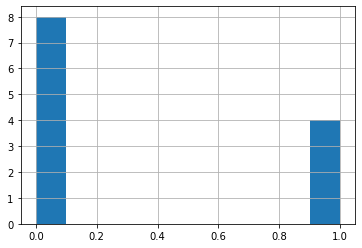

In [0]:
df.single_sample.hist();

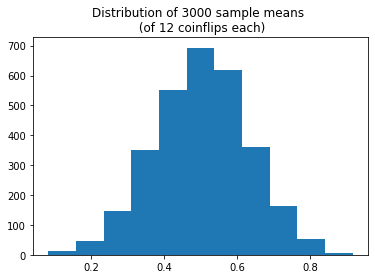

In [0]:
import matplotlib.pyplot as plt
ax = plt.hist(sample_means, bins=11)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [0]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.6, 0.4, 0.5, 0.4, 0.5, 0.3, 0.45, 0.4, 0.65, 0.6, 0.55, 0.3, 0.55, 0.6, 0.4, 0.7, 0.3, 0.4, 0.65, 0.45, 0.65, 0.3, 0.65, 0.45, 0.45, 0.6, 0.55, 0.6, 0.65, 0.65, 0.45, 0.5, 0.55, 0.5, 0.35, 0.5, 0.3, 0.65, 0.55, 0.7, 0.5, 0.55, 0.45, 0.7, 0.5, 0.4, 0.6, 0.4, 0.4, 0.5, 0.5, 0.7, 0.5, 0.5, 0.7, 0.5, 0.45, 0.4, 0.45, 0.5, 0.65, 0.4, 0.5, 0.55, 0.45, 0.4, 0.65, 0.55, 0.35, 0.5, 0.25, 0.6, 0.6, 0.3, 0.55, 0.6, 0.4, 0.55, 0.3, 0.65, 0.35, 0.55, 0.5, 0.5, 0.5, 0.7, 0.5, 0.7, 0.6, 0.7, 0.35, 0.4, 0.55, 0.15, 0.8, 0.7, 0.5, 0.55, 0.55, 0.5, 0.5, 0.45, 0.55, 0.65, 0.7, 0.85, 0.55, 0.45, 0.55, 0.6, 0.55, 0.6, 0.45, 0.5, 0.6, 0.5, 0.25, 0.5, 0.4, 0.5, 0.5, 0.35, 0.65, 0.65, 0.5, 0.45, 0.6, 0.55, 0.35, 0.45, 0.45, 0.25, 0.3, 0.65, 0.35, 0.55, 0.5, 0.3, 0.5, 0.3, 0.45, 0.65, 0.4, 0.35, 0.5, 0.5, 0.65, 0.55, 0.45, 0.45, 0.55, 0.4, 0.55, 0.5, 0.5, 0.55, 0.6, 0.55, 0.55, 0.6, 0.35, 0.4, 0.6, 0.45, 0.5, 0.45, 0.15, 0.75, 0.65, 0.55, 0.45, 0.5, 0.5, 0.7, 0.5, 0.35, 0.55, 0.55, 0.45, 0.5, 0.35, 0.5

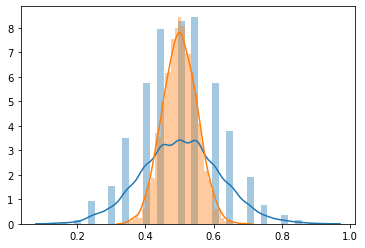

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

## Standard Error of the Mean

What does it mean to "estimate" the Population mean?

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
def mean_moe(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean, margin_of_error

In [0]:
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=20)
coinflips

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=20)

mean, margin_of_error = mean_moe(coinflips)
print("mean", mean)
print("margin of error", margin_of_error)

mean 0.45
margin of error 0.23888287692287857


In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=20)

lower_bound, mean, upper_bound = confidence_interval(coinflips)
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: 0.6785440695301621
mean 0.85
upper bound: 1.0214559304698378


## Graphically Represent a Confidence Interval

In [0]:
df = pd.DataFrame({'coinflips': coinflips})

df.head()


,coinflips
0,1
1,0
2,0
3,0
4,1


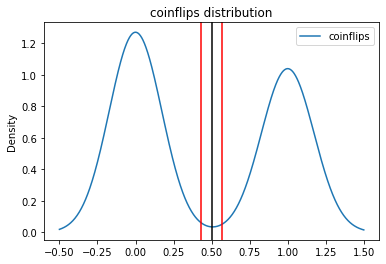

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=200)

CI = confidence_interval(coinflips)

df.plot.density()
plt.title("coinflips distribution")
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

## Other ways to plot confidence intervals:

(matplotlib errorbars - requires a mean and a margin_of_error)

In [0]:
# Other ways to p

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.7333333333333333, 0.43333333333333335, 0.5, 0.43333333333333335, 0.5, 0.5, 0.5333333333333333, 0.5, 0.4, 0.43333333333333335, 0.3333333333333333, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.5, 0.6, 0.6333333333333333, 0.5, 0.3333333333333333, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.7, 0.7, 0.5333333333333333, 0.5, 0.6666666666666666, 0.43333333333333335, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.36666666666666664, 0.4666666666666667, 0.4, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.7333333333333333, 0.4, 0.4666666666666667, 0.6, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.5, 0.36666666666666664, 0.4, 0.5666666666666667, 0.5, 0.36666666666666664, 0.5666666666666667, 0.7, 0.43333333333333335, 0.36666666666666664, 0.56666666

In [0]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.48189276007256693, 0.5181072399274331)


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.48189276007256693, 0.5181072399274331)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.0958141381351718, pvalue=0.2758187277462794)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=1.9842235343454973, pvalue=0.04999925456754134)